1. Выполнить визуализацию многомерных данных, используя t-SNE. 
Необходимо использовать набор данных MNIST или fashion MNIST (можно 
использовать и другие готовые наборы данных, где можно наблюдать 
разделение объектов по кластерам). Рассмотреть результаты визуализации для 
разных значений перплексии.

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных Fashion MNIST

In [4]:
df = pd.read_csv("fashion-mnist_train.csv")
print(df.shape)
df.head(3)

(60000, 785)


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 785 columns]

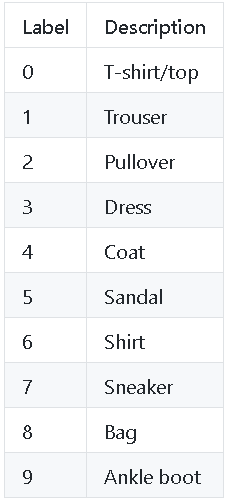

In [5]:
df_labels = df.iloc[:, 0]
df_images = df.iloc[:, 1:]

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
df_labels

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [22]:
df_images

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       5       0   
3           0       0       0       1       2       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995       0       0       0       0       0       0       0       0       0   
59996       0       0       0       0       0       0       0       0       0   
59997       0       0       0       0       0       0       0       0       0   
59998       0       0       0       0       0       0       0       0       0   
59999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0        30        43   
3            0  ...         3         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
59995        0  ...         0         0         0         0         0   
59996        0  ...        73         0         0         0         0   
59997        0  ...       160       162       163       135        94   
59998        0  ...         0         0         0         0         0   
59999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 784 columns]

In [6]:
df_images_standardized = StandardScaler().fit_transform(df_images)
df_images_standardized

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

In [7]:
df_images_normalized = Normalizer().fit_transform(df_images_standardized)
df_images_normalized

array([[-0.00029225, -0.00069776, -0.00088882, ..., -0.00486608,
        -0.00281132, -0.00101608],
       [-0.00037037, -0.00088426, -0.00112639, ..., -0.00616669,
        -0.00356273, -0.00128765],
       [-0.00037316, -0.00089093, -0.00113488, ..., -0.00621321,
        -0.00358961, -0.00129737],
       ...,
       [-0.00037544, -0.00089637, -0.00114182, ..., -0.00625117,
        -0.00361154, -0.00130529],
       [-0.00027294, -0.00065165, -0.00083009, ..., -0.00454453,
        -0.00262555, -0.00094893],
       [-0.00030253, -0.00072229, -0.00092007, ..., -0.00503717,
        -0.00291016, -0.0010518 ]])

## Предварительная визуализация

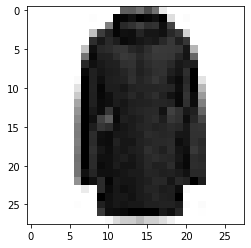

In [28]:
num = 6
plt.imshow(df_images.values.astype(np.int)[num].reshape(28,28), cmap=plt.cm.binary)

## Визуализация многомерных данных с помощью алгоритма t-SNE

In [6]:
from sklearn.manifold import TSNE

---
**Аннотация**

In [ ]:
TSNE(
    # значение по умолчанию=2. Размерность вложенного пространства
    n_components=2, 
    
    # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется 
    # в других алгоритмах обучения на множествах
    perplexity=10, 
    
    # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве
    # во вложенном пространстве и сколько места будет между ними
    early_exaggeration=12, 
    
    # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если
    # скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно 
    # равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на
    # сжатое плотное облако с незначительным количеством разбросов
    learning_rate=200, 
    
    # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250
    n_iter=5000, 
    
    # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется
    # после 250 начальных итераций с ранним преувеличением
    n_iter_without_progress=300, 
    
    # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена
    min_grad_norm=0.0000001, 
    
    # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков
    metric='euclidean', 
    
     # {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения
    init='random',
    
    # значение по умолчанию=0. Уровень детализации
    verbose=0, 
    
    # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для 
    # воспроизводимых результатов при многократном вызове функции
    random_state=42,
    
    # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата,
    # работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за 
    # время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%
    method='barnes_hut', 
    
    # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью 
    # в случае T-SNE с применением алгоритма Барнса-Хата
    angle=0.5, 
    
    # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование 
    # всех процессоров
    n_jobs=-1 
)

---

In [48]:
perplxt = 8

tSNE_params = TSNE(n_components=2, perplexity=perplxt, random_state=123)
tSNE_features = tSNE_params.fit_transform(df_images_normalized)

C:\Users\Пользователь\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Пользователь\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [46]:
from ast import literal_eval

colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(231,198,151)',
          'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
          'rgb(46,204,64)', 'rgb(255,220,0)', 'rgb(76,114,176)',
          'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

def plot_embedding_v1(X_embeded, y):
    plt.rcParams["figure.figsize"] = [16, 8]
    for k, i in enumerate(np.unique(y.astype(np.int))):
        plt.scatter(X_embeded[y == i, 0],
                    X_embeded[y == i, 1],
                    color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                    label = labels[k])
    plt.legend()
    plt.show()

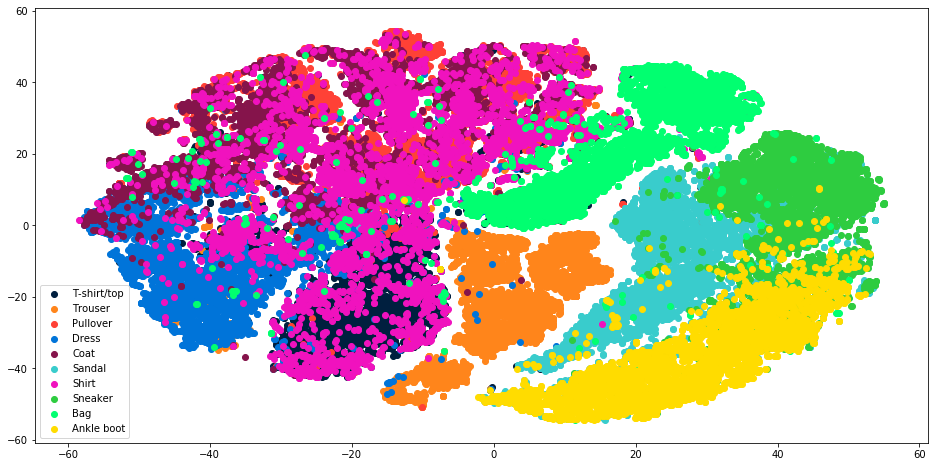

In [43]:
plot_embedding_v1(tSNE_features, df_labels)

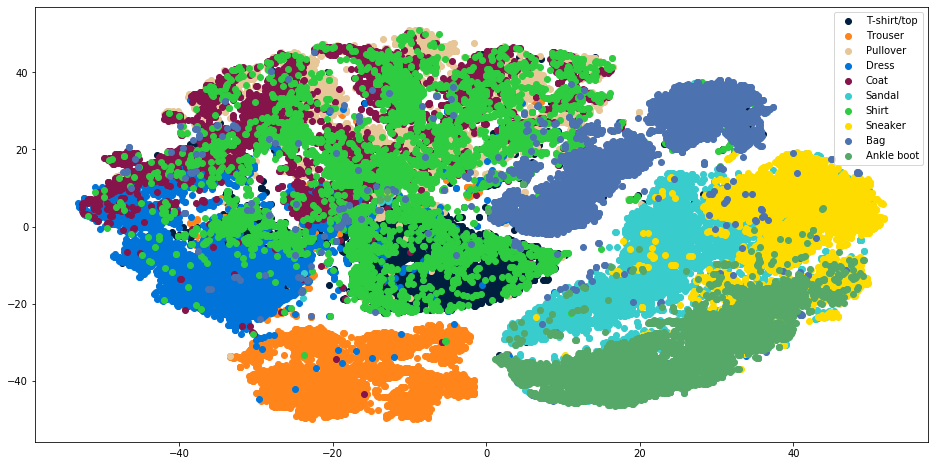

In [47]:
plot_embedding_v1(tSNE_features, df_labels)

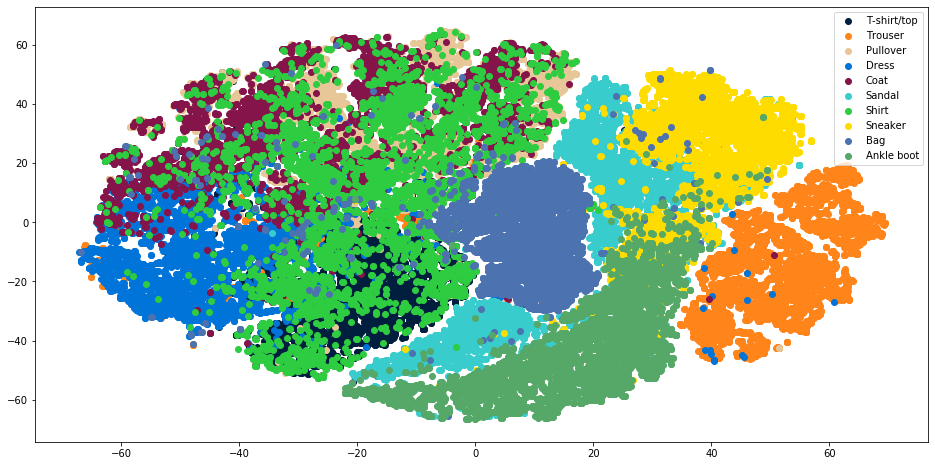

In [49]:
plot_embedding_v1(tSNE_features, df_labels)

2. Выполнить визуализацию многомерных данных, используя UMAP с 
различными параметрами n_neighbors и min_dist. Рассчитать время работы 
алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE

## Визуализация многомерных данных с помощью алгоритма UMAP

In [55]:
# pip install numpy --force-reinstall --user
# pip install librosa --user
# pip install --upgrade numba --user
pip install umap-learn --user --no-warn-script-location

Note: you may need to restart the kernel to use updated packages.


In [13]:
import umap
import plotly.express as px

In [54]:
n_neighbors = 15 # 5, 15, 35
min_dist = 0.1 # 0.1, 0.7

UMAP_params = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=123)
UMAP_features = UMAP_params.fit_transform(df_images_normalized)

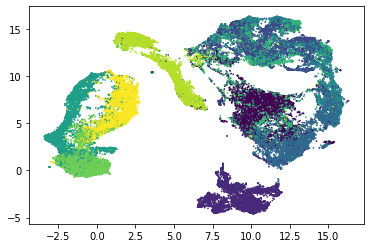

In [48]:
plt.scatter(x=UMAP_features[:, 0], y=UMAP_features[:, 1], c=df_labels, s=0.5);

In [52]:
def plot_embedding_v2(UMAP_features, labels):
    fig = px.scatter(x=UMAP_features[:, 0], y=UMAP_features[:, 1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=labels)

    fig.update_layout(dict(plot_bgcolor = 'white'))

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_layout(title_text="UMAP")
    fig.update_traces(marker=dict(size=3))

    fig.show()

In [55]:
plot_embedding_v2(UMAP_features, df_labels)

## Сравнение по времени

In [58]:
import time

def timeCheck(algorithm, data):
    start_time = time.time()
    algorithm.fit_transform(data)
    print("--- %s seconds ---" % (time.time() - start_time))

In [59]:
timeCheck(UMAP_params, df_images_normalized)

--- 54.536297082901 seconds ---
